In [623]:
from __future__ import print_function
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from skimage import io
import cv2
from skimage.util import img_as_float
import sys
from scipy.spatial.distance import cdist

In [46]:
def color_features(img):
    """ Represents a pixel by its color.
    Args:
        img - array of shape (H, W, C)
    Returns:
        features - array of (H * W, C)
    """
    H, W, C = img.shape
    img = img_as_float(img)
    features = np.zeros((H*W, C))

    ### YOUR CODE HERE
    # All we need is to flatten/reshape the image array, so that each pixel will be treated as 
    # an independent array, and this can be done using "reshape" method
    features = img.reshape(H*W, C)
    ### END YOUR CODE

    return features


In [47]:
def color_position_features(img):
    """ Represents a pixel by its color and position.
    Combine pixel's RGB value and xy coordinates into a feature vector.
    i.e. for a pixel of color (r, g, b) located at position (x, y) in the
    image. its feature vector would be (r, g, b, x, y).
    Don't forget to normalize features.
    Hints
    - You may find np.mgrid and np.dstack useful
    - You may use np.mean and np.std
    Args:
        img - array of shape (H, W, C)
    Returns:
        features - array of (H * W, C+2)
    """
    H, W, C = img.shape
    color = img_as_float(img)
    features = np.zeros((H*W, C+2))

    ### YOUR CODE HERE
    # First, we need to store all possible combinations between x,y to represent all positions, so that we can add them to our 
    # feature vector. so, the array of all possible locations will look like 
            #                            [[0,0],[0,1],[0,2],......,[0,n],
            #                             [1,0],[1,1],[1,2],......,[1,n],
            #                                         .
            #                                         .
            #                             [n,0],[n,1],[n,2],......,[n,n]]

    # this can be done using "np.dstack" method which combines an array and stores it like a stack
    # however, to be able to use np.dstack method and reach to our goal array, we need the input to be like
            #                            [[0,0,0,...,1,1,1,.......,n,n,n],
            #                             [0,1,2,...,0,1,2,.......,0,1,2]] 
        
    # And the above array can be formed using "np.mgrid" method which returns mesh-grid ndarrays all of the same dimensions,  
    # and then reshaping it to be (2,h*w), so the steps are as follows :-
    # 1-create mesh-grid ndarrays
    # 2-reshape it to be (2,h*w)
    # 3-use np.dstack to have all locations
    mesh_grid = np.mgrid[0 : H, 0 : W]
    # the output will be 
                                    #array([[[  0,   0,   0, ...,   0,   0,   0],
                                    #        [  1,   1,   1, ...,   1,   1,   1],
                                    #        [  2,   2,   2, ...,   2,   2,   2],
                                    #        ...,
                                    #        [396, 396, 396, ..., 396, 396, 396],
                                    #        [397, 397, 397, ..., 397, 397, 397],
                                    #        [398, 398, 398, ..., 398, 398, 398]],
                                    #
                                    #       [[  0,   1,   2, ..., 621, 622, 623],
                                    #        [  0,   1,   2, ..., 621, 622, 623],
                                    #        [  0,   1,   2, ..., 621, 622, 623],
                                    #        ...,
                                    #        [  0,   1,   2, ..., 621, 622, 623],
                                    #        [  0,   1,   2, ..., 621, 622, 623],
                                    #        [  0,   1,   2, ..., 621, 622, 623]]])
    mesh_grid_reshaped = mesh_grid.reshape((2,H*W))                                    
    # the output will be 
                                    #array([[  0,   0,   0, ..., 398, 398, 398],
                                    #       [  0,   1,   2, ..., 621, 622, 623]])
    xy_combinations = np.dstack(mesh_grid_reshaped)        
    # the final output will be
                                    #array([[[  0,   0],
                                    #        [  0,   1],
                                    #        [  0,   2],
                                    #        ...,
                                    #        [398, 621],
                                    #        [398, 622],
                                    #        [398, 623]]])
                            
    # now, we have the positions to be store,so let's prepare the colors to be stored also
    # color shape is (h,w,3), so let's flatten/reshape this array to be (h*w,3), in this way, we have each pixel color
    # as an independent array (r,g,b), and this will make it easy for us to concatenate them later
    color_reshaped = color.reshape((H * W, 3))
    # now, let's concatenate color and position for each pixel to the final feature vector
    features[:,0:C] = color_reshaped
    features[:,C:C+2] = xy_combinations
    # normalize features
    features = normalize_Features(features)
    ### END YOUR CODE

    return features

In [48]:
def normalize_Features(features) :
    mean = np.mean(features,axis = 0)
    standard_deviation = np.std(features,axis = 0)
    return (features - mean)/standard_deviation

(399, 624, 3)


array([[237, 227, 220],
       [237, 227, 220],
       [237, 227, 220],
       ...,
       [251, 247, 246],
       [251, 247, 246],
       [251, 247, 246]], dtype=uint8)

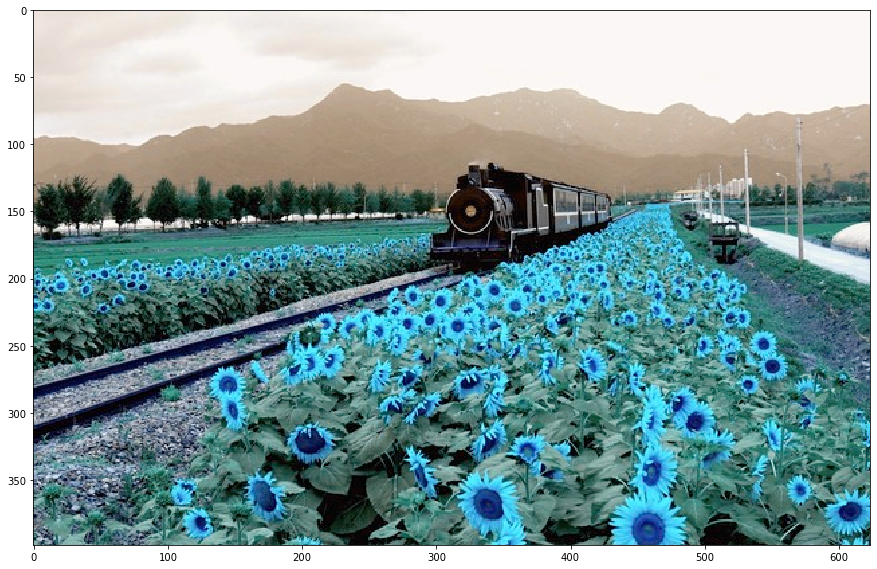

In [639]:
img = cv2.imread("train.jpg")
h,w,c = img.shape
print(img.shape)
plt.imshow(img)
img[0]

In [98]:
color = img_as_float(img).reshape(h*w,3)
color

array([[0.92941176, 0.89019608, 0.8627451 ],
       [0.92941176, 0.89019608, 0.8627451 ],
       [0.92941176, 0.89019608, 0.8627451 ],
       ...,
       [0.46666667, 0.86666667, 0.94117647],
       [0.29411765, 0.60392157, 0.67843137],
       [0.        , 0.12941176, 0.20392157]])

In [88]:
loc =  np.dstack(np.mgrid[0 : h, 0 : w].reshape(2,h*w))
loc

array([[[  0,   0],
        [  0,   1],
        [  0,   2],
        ...,
        [398, 621],
        [398, 622],
        [398, 623]]])

In [65]:
ars = arr[0].reshape(1,h*w)
ars

array([[  0,   0,   0, ..., 398, 398, 398]])

In [93]:
arr = np.mgrid[0 : h, 0 : w].reshape(2,h*w)
arr

array([[  0,   0,   0, ..., 398, 398, 398],
       [  0,   1,   2, ..., 621, 622, 623]])

In [640]:
features = color_features(img)
(features)

array([[0.92941176, 0.89019608, 0.8627451 ],
       [0.92941176, 0.89019608, 0.8627451 ],
       [0.92941176, 0.89019608, 0.8627451 ],
       ...,
       [0.46666667, 0.86666667, 0.94117647],
       [0.29411765, 0.60392157, 0.67843137],
       [0.        , 0.12941176, 0.20392157]])

In [633]:
def kmeans(features, k, num_iters=100):
    N, D = features.shape

    #assert N >= k, 'Number of clusters cannot be greater than number of points'

    # Randomly initalize cluster centers
    idxs = np.random.choice(N, size=k, replace=False)
    centroids = features[idxs]
    assignments = np.zeros(N)
    print(centroids)

    for n in range(num_iters):
        ### YOUR CODE HERE
        assignments = assign(features,centroids,k)
        old_Centroids = centroids.copy()
        centroids = get_New_Centroids(features,assignments,k)
        
        if is_Converged(old_Centroids,centroids,k):
            break
        ### END YOUR CODE

    return assignments


In [634]:
kmeansout = kmeans(features, 3)

[[0.31764706 0.5254902  0.49019608]
 [0.06666667 0.06666667 0.09019608]
 [0.37254902 0.55294118 0.52941176]]


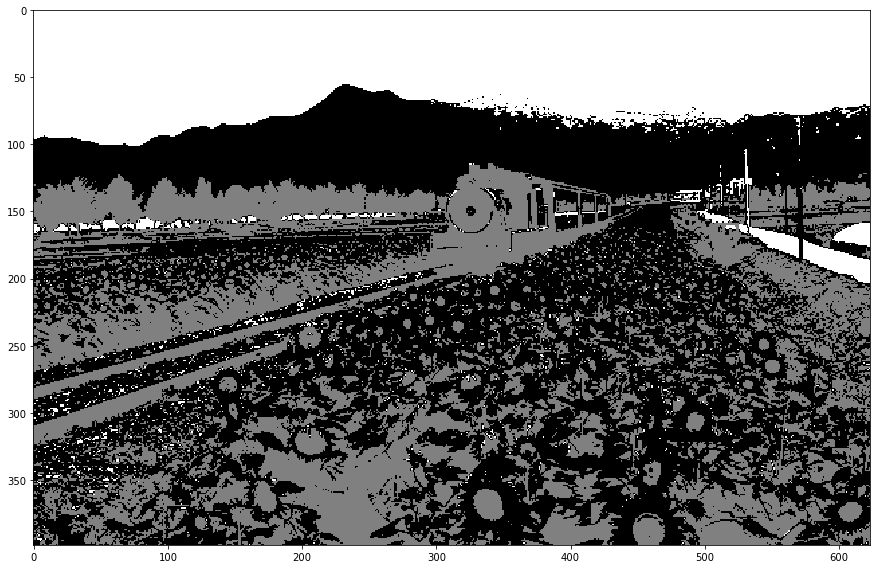

In [635]:
segments = kmeansout.reshape((h, w))
plt.imshow(segments)

In [627]:
def assign(features,centroids,k) :
    N, _ = features.shape
    assignments = np.zeros(N)
    for i in range(N):
        distances = np.zeros(k)
        for j in range(len(centroids)):
            distances[j] = euclidean_distance(features[i],centroids[j])
        closest_distance = np.argmin(distances)   
        assignments[i] = closest_distance
    return assignments 
        

In [625]:
def get_min(distances):
    min_distance = sys.maxsize
    index = 0
    for i in range(len(distances)):
        if(distances[i] < min):
            min_distance = distances[i]
            index = i
    return index       

In [516]:
def get_New_Centroids(features,assignments,k) :
    centroids = [[] for _ in range(k)]
    for i in range(k):
        centroids[i] = np.mean(features[assignments == i], axis=0)
    return centroids    

In [602]:
def get_New_Centroids2(features,assignments,k) :
    centroids = [[] for _ in range(k)]
    for i in range(k):
        collected_features = collect_Features(features,assignments,i)
        centroids[i] = np.mean(collected_features, axis=0)
    return centroids    

In [595]:
def collect_Features(features,assignments,i):
    N, _ = features.shape
    collected_features = []
    for j in range(N):
        if (assignments[j] == i):
            collected_features.append(features[j])
    return collected_features        

In [597]:
def get_Mean(features):
    N, D = np.array(features).shape
    if(D == 3):
        s1=0
        s2=0
        s3=0
        mean = []
        for i in range(N):
            s1 += features[i][0]
            s2 += features[i][1]
            s3 += features[i][2]
        mean[0] = s1/N 
        mean[1] = s2/N
        mean[2] = s3/N
    return mean    

In [54]:
def is_Converged(old_Centroids, new_Centroids,k):
    distances = [[] for _ in range(k)]
    for i in range(k) :
        distances[i] = euclidean_distance(old_Centroids[i],new_Centroids[i])
    return sum(distances) == 0    

In [515]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1 - x2)**2, axis=0))

In [636]:
def kmeans_fast(features, k, num_iters=100):
    

    N, D = features.shape

    assert N >= k, 'Number of clusters cannot be greater than number of points'

    # Randomly initalize cluster centers
    idxs = np.random.choice(N, size=k, replace=False)
    centroids = features[idxs]
    assignments = np.zeros(N)
    print(centroids)

    for n in range(num_iters):
        ### YOUR CODE HERE
        assignments = assign_Fast(features,centroids,k)
        old_Centroids = centroids.copy()
        centroids = get_New_Centroids(features,assignments,k)
        
        if is_Converged(old_Centroids,centroids,k):
            break
        ### END YOUR CODE

    return assignments



In [641]:
kmeansfastout = kmeans_fast(features, 3)

[[0.4        0.58431373 0.52156863]
 [0.32941176 0.73333333 0.9254902 ]
 [0.55686275 0.54117647 0.47058824]]


In [57]:
def assign_Fast2(features,centroids,k):
    N, _ = features.shape
    assignments = np.zeros(N)
    tiled_Features = np.tile(features, (k, 1))
    repeated_Centroids = np.repeat(centroids, N, axis=0) 
    assignments = np.argmin(np.sum((tiled_Features - repeated_Centroids)**2, axis=1).reshape(k, N), axis=0)
    return assignments

In [59]:
def assign_Fast(features,centroids,k):
    N, _ = features.shape
    assignments = np.zeros(N)
    distances = cdist(features,centroids)
    assignments = np.argmin(distances,axis=1)
    return assignments    

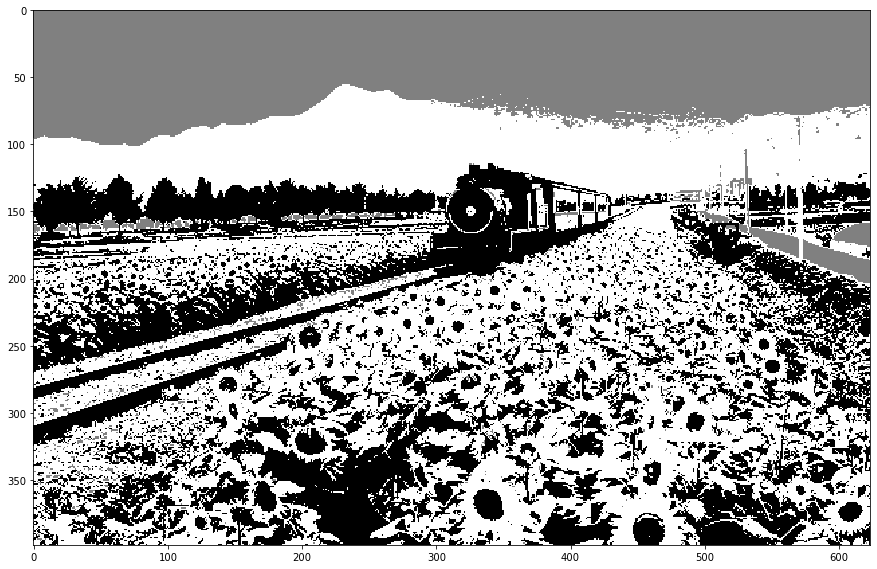

In [642]:
segments = kmeansfastout.reshape((h, w))
plt.imshow(segments)

In [29]:
mask_gt = np.zeros((100, 100))
mask = np.zeros((100, 100))

# Test compute_accracy function
mask_gt[20:50, 30:60] = 1
mask[30:50, 30:60] = 1


In [63]:
def compute_accuracy(mask_gt, mask):
    """ Compute the pixel-wise accuracy of a foreground-background segmentation
        given a ground truth segmentation.
    Args:
        mask_gt - The ground truth foreground-background segmentation. A
            logical of size H x W where mask_gt[y, x] is 1 if and only if
            pixel (y, x) of the original image was part of the foreground.
        mask - The estimated foreground-background segmentation. A logical
            array of the same size and format as mask_gt.
    Returns:
        accuracy - The fraction of pixels where mask_gt and mask agree. A
            bigger number is better, where 1.0 indicates a perfect segmentation.
    """
    H,W = mask.shape
    no_of_pixels = H * W
    accuracy = None
    ### YOUR CODE HERE
    #---------------------------------------------------------------------------------------
    # First approach using nested loop to search for pixels where mask and mask_gt agree
    count = 0
    for i in range(len(mask)) : 
        for j in range(len(mask[0])) :
            if(mask[i][j] == mask_gt[i][j]):
                count += 1
    
    #accuracy = (count/no_of_pixels)   
    #---------------------------------------------------------------------------------------
    #Second approach makes use of numpy mean function
    accuracy = np.mean(mask_gt == mask)        
    #---------------------------------------------------------------------------------------
    ### END YOUR CODE

    return accuracy

In [47]:
acc = compute_accuracy(mask_gt,mask)
acc

0.97

In [127]:
def kmeans2(features, k, num_iters=100):
    """ Use kmeans algorithm to group features into k clusters.
    K-Means algorithm can be broken down into following steps:
        1. Randomly initialize cluster centers
        2. Assign each point to the closest center
        3. Compute new center of each cluster
        4. Stop if cluster assignments did not change
        5. Go to step 2
    Args:
        features - Array of N features vectors. Each row represents a feature
            vector.
        k - Number of clusters to form.
        num_iters - Maximum number of iterations the algorithm will run.
    Returns:
        assignments - Array representing cluster assignment of each point.
            (e.g. i-th point is assigned to cluster assignments[i])
    """

    N, D = features.shape

    assert N >= k, 'Number of clusters cannot be greater than number of points'

    # Randomly initalize cluster centers
    idxs = np.random.choice(N, size=k, replace=False)
    centroids = features[idxs]
    assignments = np.zeros(N)

    for n in range(num_iters):
        ### YOUR CODE HERE
        assignments = assign(features,centroids,k)
        old_Centroids = centroids.copy()
        centroids = get_New_Centroids(features,assignments,k)

        if is_Converged(old_Centroids,centroids,k):
                break
        ### END YOUR CODE

    return assignments

In [5]:
# Setup
from __future__ import print_function
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from skimage import io

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

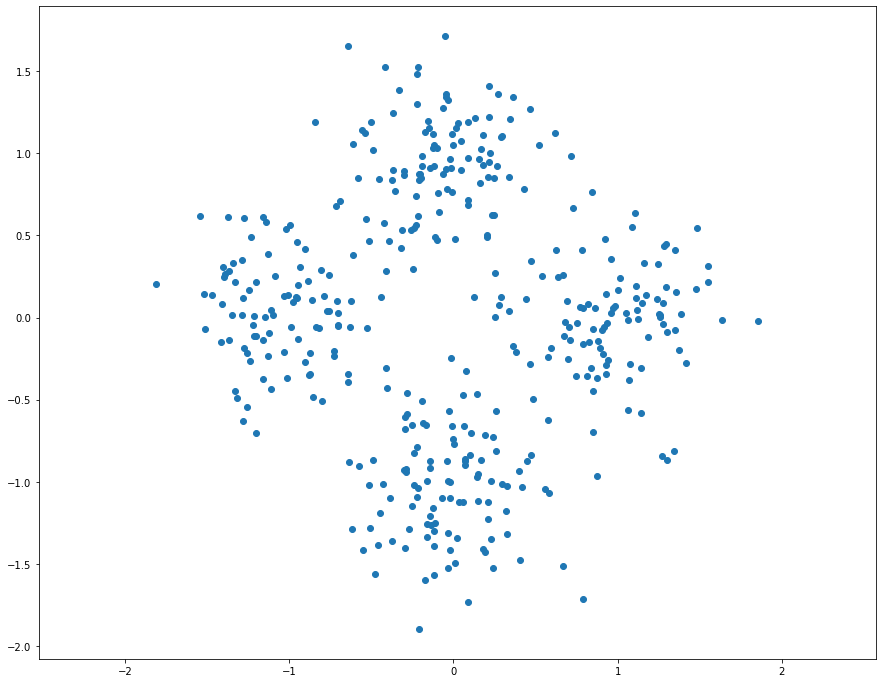

In [522]:
# Generate random data points for clustering

# Set seed for consistency
np.random.seed(0)

# Cluster 1
mean1 = [-1, 0]
cov1 = [[0.1, 0], [0, 0.1]]
X1 = np.random.multivariate_normal(mean1, cov1, 100)

# Cluster 2
mean2 = [0, 1]
cov2 = [[0.1, 0], [0, 0.1]]
X2 = np.random.multivariate_normal(mean2, cov2, 100)

# Cluster 3
mean3 = [1, 0]
cov3 = [[0.1, 0], [0, 0.1]]
X3 = np.random.multivariate_normal(mean3, cov3, 100)

# Cluster 4
mean4 = [0, -1]
cov4 = [[0.1, 0], [0, 0.1]]
X4 = np.random.multivariate_normal(mean4, cov4, 100)

# Merge two sets of data points
X = np.concatenate((X1, X2, X3, X4))

# Plot data points
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

[[-0.61230544  1.05969703]
 [ 0.40666385 -1.47655474]
 [ 0.23887709 -0.72570169]
 [-0.11176493  0.48882598]]
kmeans running time: 0.169279 seconds.


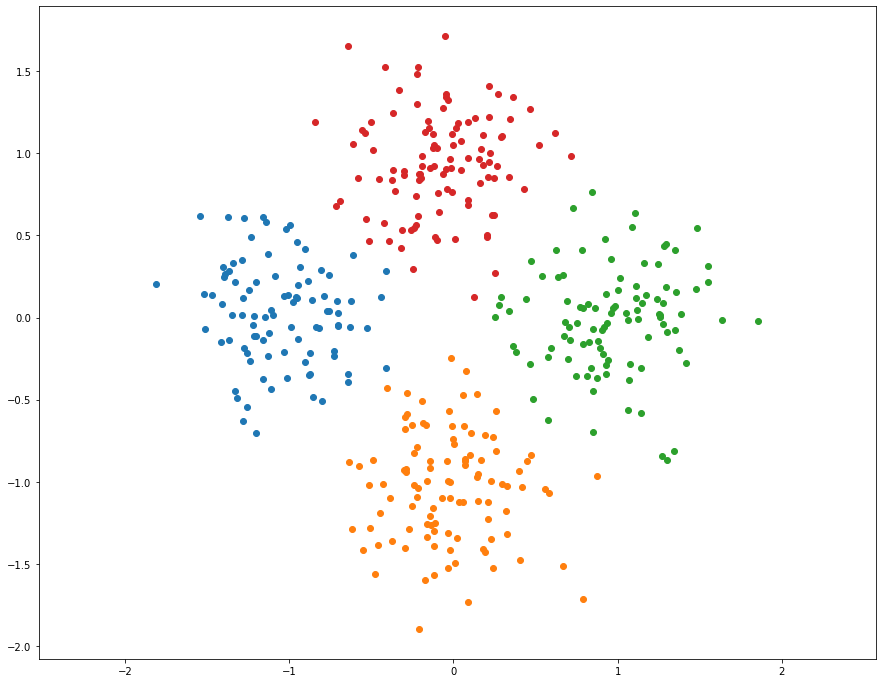

In [628]:
#from segmentation import kmeans

np.random.seed(0)
start = time()
assignments = kmeans(X, 4)
end = time()

kmeans_runtime = end - start

print("kmeans running time: %f seconds." % kmeans_runtime)

for i in range(4):
    cluster_i = X[assignments==i]
    plt.scatter(cluster_i[:, 0], cluster_i[:, 1])

plt.axis('equal')
plt.show()

In [432]:
def kmeans_fast_5(features, k, num_iters=100):
    """ Use kmeans algorithm to group features into k clusters.
    This function makes use of numpy functions and broadcasting to speed up the
    first part(cluster assignment) of kmeans algorithm.
    Hints
    - You may find np.repeat and np.argmin useful
    Args:
        features - Array of N features vectors. Each row represents a feature
            vector.
        k - Number of clusters to form.
        num_iters - Maximum number of iterations the algorithm will run.
    Returns:
        assignments - Array representing cluster assignment of each point.
            (e.g. i-th point is assigned to cluster assignments[i])
    """

    N, D = features.shape

    assert N >= k, 'Number of clusters cannot be greater than number of points'

    # Randomly initalize cluster centers
    idxs = np.random.choice(N, size=k, replace=False)
    centers = features[idxs]
    assignments = np.zeros(N)
    print("d")

    for n in range(num_iters):
        ### YOUR CODE HERE
        f_tmp = np.tile(features, (k, 1))
        c_tmp = np.repeat(centers, N, axis=0)
        assignments = np.argmin(np.sum((f_tmp - c_tmp)**2, axis=1).reshape(k, N), axis=0)
        tmp = centers.copy()
        for j in range(k):
            centers[j] = np.mean(features[assignments == j], axis=0)
        if np.allclose(tmp, centers):
            break
        ### END YOUR CODE

    return assignments

[[-0.61230544  1.05969703]
 [ 0.40666385 -1.47655474]
 [ 0.23887709 -0.72570169]
 [-0.11176493  0.48882598]]
kmeans running time: 0.015568 seconds.
10.873698 times faster!


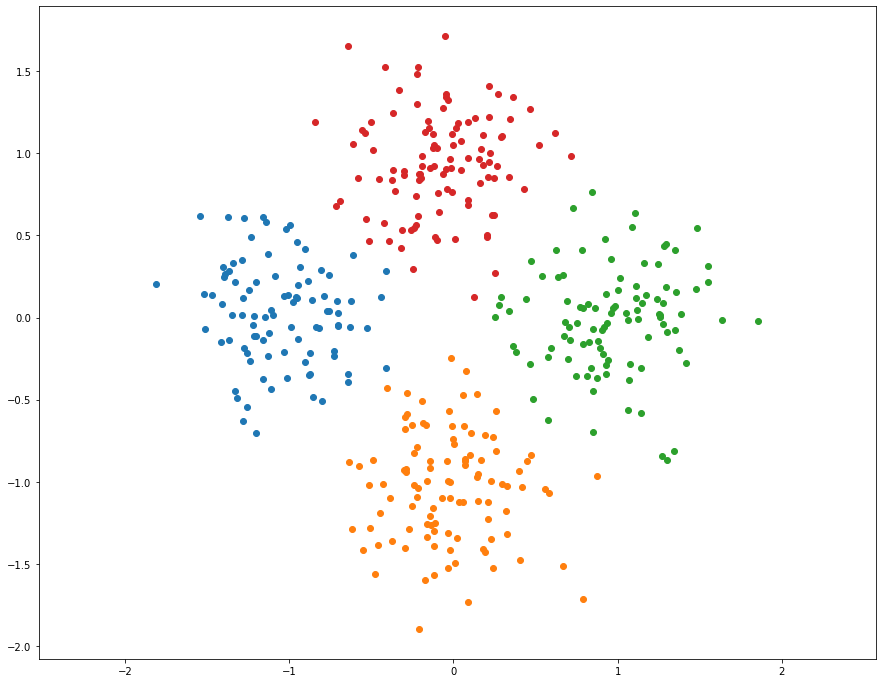

In [630]:
np.random.seed(0)
start = time()
assignments = kmeans_fast(X, 4)
end = time()

kmeans_fast_runtime = end - start
print("kmeans running time: %f seconds." % kmeans_fast_runtime)
print("%f times faster!" % (kmeans_runtime / kmeans_fast_runtime))


for i in range(4):
    cluster_i = X[assignments==i]
    plt.scatter(cluster_i[:, 0], cluster_i[:, 1])

plt.axis('equal')
plt.show()

kmeans running time: 0.463449 seconds.
289.769529 times faster!


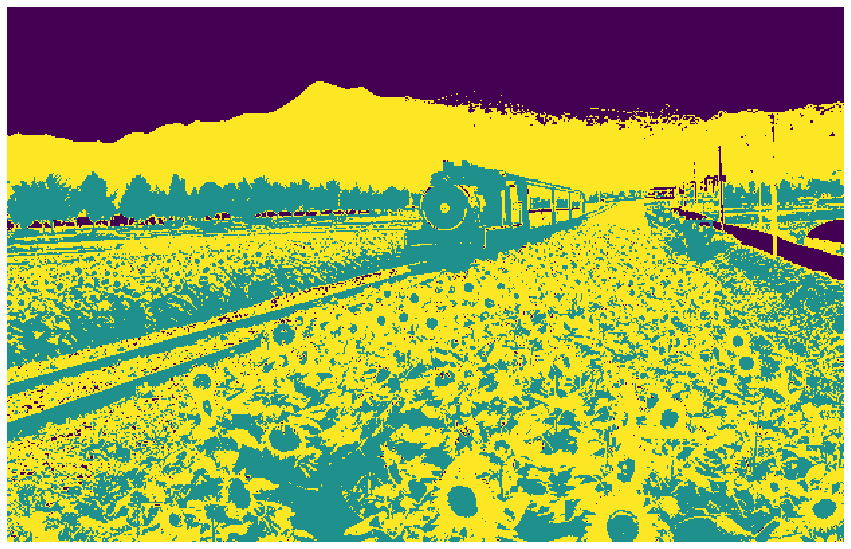

In [659]:
from segmentation import color_features
np.random.seed(0)

features = color_features(img)

# Sanity checks
assert features.shape == (h * w, 3),\
    "Incorrect shape! Check your implementation."

assert features.dtype == float,\
    "dtype of color_features should be float."
start = time()
assignments = kmeans_fast(features, 3)
end = time()
kmeans_fast_runtime = end - start
print("kmeans running time: %f seconds." % kmeans_fast_runtime)
print("%f times faster!" % (kmeans_runtime / kmeans_fast_runtime))
segments = assignments.reshape((h, w))

# Display segmentation
plt.imshow(segments, cmap='viridis')
plt.axis('off')
plt.show()

[[0.9254902  0.97254902 0.97254902]
 [0.21176471 0.38039216 0.36862745]
 [0.36862745 0.57254902 0.53333333]]
kmeans running time: 134.293330 seconds.


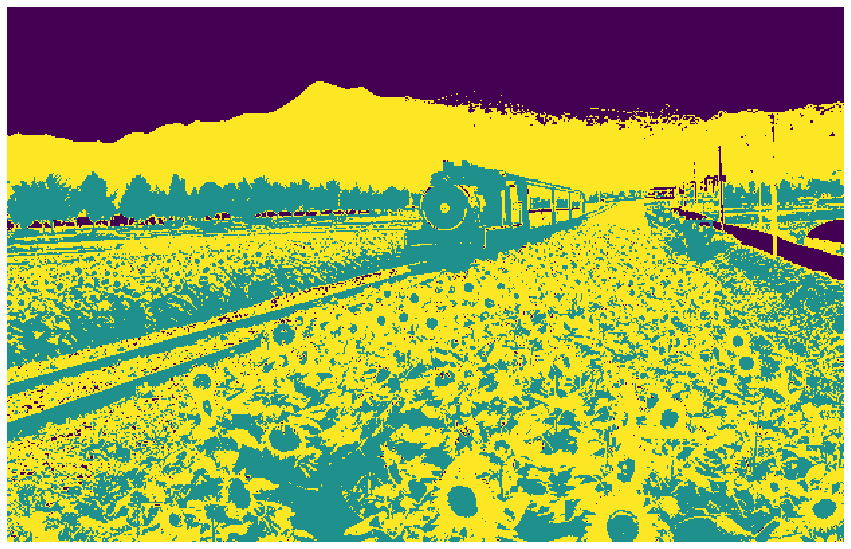

In [653]:
from segmentation import color_features
np.random.seed(0)

features = color_features(img)

# Sanity checks
assert features.shape == (h * w, 3),\
    "Incorrect shape! Check your implementation."

assert features.dtype == float,\
    "dtype of color_features should be float."
start = time()
assignments = kmeans(features, 3)
end = time()
kmeans_runtime = end - start
print("kmeans running time: %f seconds." % kmeans_runtime)
segments = assignments.reshape((h, w))

# Display segmentation
plt.imshow(segments, cmap='viridis')
plt.axis('off')
plt.show()